In [5]:
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
import copy
from math import e

### Problem 2

#### Part (a)&(b)

In [10]:
# rounding sub function
def rounding(x_origin):
    n = 5
    s = '%.'+str(n)+'g'
    x_float = float(s % x_origin)
    return x_float
# compute the denominator    
def factorial(n):
    fac = 1.0
    fac = rounding(fac)
    for i in range(1, n+1):
        fac = fac*i
        fac = rounding(fac)
    return fac
# compute the numerator
def exponential(x, n):
    exp = 1.
    x = rounding(x)
    for i in range(0, n):
        exp = exp * x
        exp = rounding(exp)
    return exp
# compute f(x) = e^x
func_ex = 0
x = 5.5
n = 30
# compute each term 
term = np.zeros(31, dtype=float)
for i in range(0, n):
    term[i] = exponential(x, i)/factorial(i)
    term[i] = rounding(term[i])
print(term)
# Adding from left to right
print('Adding from left to right:')   
for i in range(0, n):
    func_ex_laststep = func_ex
    func_ex = 0
    for j in range(0, i+1):
        func_ex = func_ex + term[j]
        func_ex = rounding(func_ex)
    if func_ex_laststep == func_ex:
        print('Result converges at n =', i)
        break
print('e^x with 5-digit mantissa =', func_ex) 
print('e^x with built in func =', e**x) 
err = abs(func_ex - e**x)/(e**x)
print('relative error = %0.6f' % err)

[1.0000e+00 5.5000e+00 1.5125e+01 2.7730e+01 3.8129e+01 4.1942e+01
 3.8447e+01 3.0208e+01 2.0768e+01 1.2692e+01 6.9805e+00 3.4902e+00
 1.5997e+00 6.7679e-01 2.6588e-01 9.7484e-02 3.3510e-02 1.0842e-02
 3.3128e-03 9.5898e-04 2.6372e-04 6.9070e-05 1.7269e-05 4.1297e-06
 9.4638e-07 2.0821e-07 4.4043e-08 8.9715e-09 1.7623e-09 3.3422e-10
 0.0000e+00]
Adding from left to right:
Result converges at n = 18
e^x with 5-digit mantissa = 244.71
e^x with built in func = 244.69193226422033
relative error = 0.000074


#### Part (c)

In [11]:
# Adding from right to left
print('Adding from right to left:')
func_ex = 0
x = 5.5
n = 30
for i in range(0, n):
    func_ex_laststep = func_ex
    func_ex = 0
    for j in range(i, -1, -1):
        func_ex = func_ex + term[j]
        func_ex = rounding(func_ex)
    if func_ex_laststep == func_ex:
        print('Result converges at n =', i)
        break
print('e^x with 5-digit mantissa =', func_ex) 
print('e^x with built in func =', e**x) 
err = abs(func_ex - e**x)/(e**x)
print('relative error = %0.6f' % err)

Adding from right to left:
Result converges at n = 17
e^x with 5-digit mantissa = 244.69
e^x with built in func = 244.69193226422033
relative error = 0.000008


#### Part (d)

In [12]:
# Flip the sign of the odd-index terms, which is equivalent to set x = -5.5
term_neg = np.zeros(31, dtype=float)
for i in range(0, n):
    term_neg[i] = (-1)**i*term[i]
print(term_neg)

[ 1.0000e+00 -5.5000e+00  1.5125e+01 -2.7730e+01  3.8129e+01 -4.1942e+01
  3.8447e+01 -3.0208e+01  2.0768e+01 -1.2692e+01  6.9805e+00 -3.4902e+00
  1.5997e+00 -6.7679e-01  2.6588e-01 -9.7484e-02  3.3510e-02 -1.0842e-02
  3.3128e-03 -9.5898e-04  2.6372e-04 -6.9070e-05  1.7269e-05 -4.1297e-06
  9.4638e-07 -2.0821e-07  4.4043e-08 -8.9715e-09  1.7623e-09 -3.3422e-10
  0.0000e+00]


In [13]:
# Always adding from left to right
print('Adding from left to right:')  
func_ex = 0
for i in range(0, n):
    func_ex_laststep = func_ex
    func_ex = 0
    for j in range(0, i+1):
        func_ex = func_ex + term_neg[j]
        func_ex = rounding(func_ex)
    if func_ex_laststep == func_ex:
        print('Result converges at n =', i)
        break
print('e^x with 5-digit mantissa =', func_ex) 
print('e^x with built in func =', e**(-5.5)) 
err = abs(func_ex - e**(-5.5))/e**(-5.5)
print('relative error = %0.4f' % err)
# Always adding from right to left
func_ex = 0
print('Adding from right to left:')   
for i in range(0, n):
    func_ex_laststep = func_ex
    func_ex = 0
    for j in range(i, -1, -1):
        func_ex = func_ex + term_neg[j]
        func_ex = rounding(func_ex)
    if func_ex_laststep == func_ex:
        print('Result converges at n =', i)
        break
print('e^x with 5-digit mantissa =', func_ex) 
print('e^x with built in func =', e**(-5.5)) 
err = abs(func_ex - e**(-5.5))/e**(-5.5)
print('relative error = %0.4f' % err)

Adding from left to right:
Result converges at n = 26
e^x with 5-digit mantissa = 0.0038363
e^x with built in func = 0.004086771438464068
relative error = 0.0613
Adding from right to left:
Result converges at n = 20
e^x with 5-digit mantissa = 0.004
e^x with built in func = 0.004086771438464068
relative error = 0.0212


In [14]:
# Adding positive from left to right, negative from right to left
func_ex = 0
print('Adding positive from left to right, negative from right to left:')   
for i in range(0, n):
    func_ex_laststep = func_ex
    func_ex = 0
    func_ex_1 = 0
    func_ex_2 = 0
    for j in range(0, i+1):
        if term_neg[j] >= 0:
            func_ex_1 = func_ex_1 + term_neg[j] 
            func_ex_1 = rounding(func_ex_1)
    for j in range(i, -1, -1):
        if term_neg[j] <= 0:
            func_ex_2 = func_ex_2 + term_neg[j] 
            func_ex_2 = rounding(func_ex_2)
    func_ex = func_ex_1 + func_ex_2
    func_ex = rounding(func_ex)
    if func_ex_laststep == func_ex:
        print('Result converges at n =', i)
        break
print('e^x with 5-digit mantissa =', func_ex) 
print('e^x with built in func =', e**(-5.5)) 
err = abs(func_ex - e**(-5.5))/e**(-5.5)
print('relative error = %0.4f' % err)
# Adding positive from right to left, negative from left to right
print('Adding positive from right to left, negative from left to right:')
func_ex = 0
for i in range(0, n):
    func_ex_laststep = func_ex
    func_ex = 0
    func_ex_1 = 0
    func_ex_2 = 0
    for j in range(0, i+1):
        if term_neg[j] <= 0:
            func_ex_1 = func_ex_1 + term_neg[j] 
            func_ex_1 = rounding(func_ex_1)
    for j in range(i, -1, -1):
        if term_neg[j] >= 0:
            func_ex_2 = func_ex_2 + term_neg[j] 
            func_ex_2 = rounding(func_ex_2)
    func_ex = func_ex_1 + func_ex_2
    func_ex = rounding(func_ex)
    if func_ex_laststep == func_ex:
        print('Result converges at n =', i)
        break
print('e^x with 5-digit mantissa =', func_ex) 
print('e^x with built in func =', e**(-5.5)) 
err = abs(func_ex - e**(-5.5))/e**(-5.5)
print('relative error = %0.4f' % err)

Adding positive from left to right, negative from right to left:
Result converges at n = 18
e^x with 5-digit mantissa = 0.0
e^x with built in func = 0.004086771438464068
relative error = 1.0000
Adding positive from right to left, negative from left to right:
Result converges at n = 19
e^x with 5-digit mantissa = 0.01
e^x with built in func = 0.004086771438464068
relative error = 1.4469


#### Comment for (d):
Adding positive from left to right, negative from right to left converges the fast.
Adding from right to left gives the lowest error.
When the exponential is positive, adding from right to left also gives relatively smaller error and faster convergence.

#### Part (e):
We can compute $e^{-x}$ by $\frac{1}{e^{x}}$
In this case with 5-digit mantissa we have $e^{-5.5}=1/e^{5.5}=1/244.69=4.0868\times10^{-3}$ which gives pretty satisfactory result.

### Problem 4 - Plot

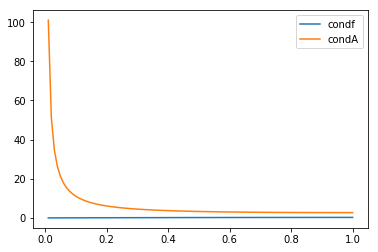

In [15]:
# rr = np.arange(0.001, 1, 0.001)
rr = np.linspace(0.01, 1, num=101)
def y1(x): 
    return x / (np.exp(x) + 1.) 
def y2(x): 
    return (np.exp(x)) / x 

plt.plot(rr, y1(rr))
plt.plot(rr, y2(rr))
plt.legend(['condf', 'condA'])
plt.show()

### Problem 5

In [21]:
elim = list()
elim.append(2) # n =1
n_stop = 1
for i in range(1, 100): 
    n = 10**i
    e = (1+1/n)**n
    elim.append(e)
    diff = elim[i] - elim[i-1]
    if abs(diff) < 10**(-13):
        n_stop = n
        break
print(diff)
print(elim)
print('n = ''%.2E' % Decimal(n))

0.0
[2, 2.5937424601000023, 2.7048138294215285, 2.7169239322355936, 2.7181459268249255, 2.7182682371922975, 2.7182804690957534, 2.7182816941320818, 2.7182817983473577, 2.7182820520115603, 2.7182820532347876, 2.71828205335711, 2.7185234960372378, 2.716110034086901, 2.716110034087023, 3.035035206549262, 1.0, 1.0]
n = 1.00E+17


### Analysis for Problem 5:
An explanation that accounts for why the value converges to the value it did:
Because double precision only has 52 digits for mantissa which is approximately 15 decimal figures. When n increases to 16 $1/10^n$ is actually stored as 0, therefore $(1+1/10^n)^n$ becomes 1. <br />
In other word, there is a limit on how accurate $(1+1/10^n)^n$ can be as an approximate of e. With double precision 13-sigfig cannot be reached.

### Problem 6

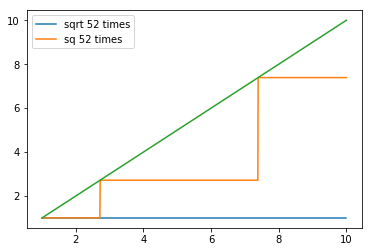

In [17]:
x = np.linspace(1, 10, 1001, dtype='float64')
x1 = np.linspace(1, 10, 1001, dtype='float64')
for i in range(0,52):
    x1 = x1**0.5
    i = i+1
x2 = copy.deepcopy(x1)
for i in range(0,52):
    x2 = x2**2
    i = i+1 
plt.plot(x, x1)
plt.plot(x, x2)
plt.plot(x, x, '-')
plt.legend(['sqrt 52 times', 'sq 52 times'])
plt.show()

In [18]:
x_exact = list()
for i in range(0, 1001): 
    if abs(x[i] - x2[i])/(x[i]+0.0000000001) < 10**(-3):
        x_exact.append(x[i])
print(x_exact)

[1.0, 2.719, 7.39]


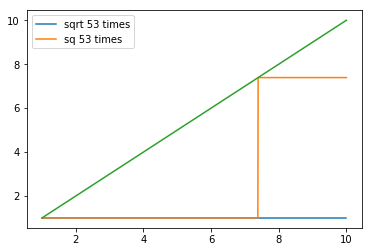

In [19]:
x = np.linspace(1, 10, 1001, dtype='float64')
x1 = np.linspace(1, 10, 1001, dtype='float64')
for i in range(0,53):
    x1 = x1**0.5
    i = i+1
x2 = copy.deepcopy(x1)
for i in range(0,53):
    x2 = x2**2
    i = i+1 
plt.plot(x, x1)
plt.plot(x, x2)
plt.plot(x, x, '-')
plt.legend(['sqrt 53 times', 'sq 53 times'])
plt.show()

In [20]:
x_exact = list()
for i in range(0, 1001): 
    if abs(x[i] - x2[i])/(x[i]+0.0000000001) < 10**(-3):
        x_exact.append(x[i])
print(x_exact)

[1.0, 7.39]


### Ananlysis of Problem 6:
When doing the operation 52 times, the "close points" are: [1.0, 2.719, 7.39]  <br />
When doing 53 times: [1.0, 7.39] <br /> 

We find some interesting numbers here:
$2.719 \simeq e$, $7.39 \simeq e^2$ ... apparently the calculation is done with e as the base number. Note that the number of sqaure root operation 52 is the significant digits in double precision binary representation. <br />
Therefore we can see what happened is that there are a few steps in the square root implementation: <br />
1. A number x is handed in and ln(x) is computed
2. ln(x) is transformed into its double-precision binary representation 
3. ln(x) is devided by 2, which is equal to moving the mantissa $\sum_{l=1}^{52} b_{l}\times 2^{-l}$one digit to the right and rounding up
4. transform ln(x)/2 back by e^(ln(x)/2) = x^(1/2)

After 52 operations, ln(x) almost loses all its significant figures no matter where it started with. Only 2^0 and 2^1 survive which corresponds to e^1 and e^2. If we push even further, only 2^1 survives. This accounts for the steps we are seeing in the plots respectively.